<a href="https://colab.research.google.com/github/Mafaz03/Autoencoder/blob/main/analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q praw
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import praw
import pandas as pd
from tqdm import tqdm
import requests
from PIL import Image
from torchvision import transforms
from io import BytesIO
import numpy as np
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.4 MB/s eta 0:00:00


In [2]:
pd.set_option('display.max_rows', None)

In [3]:
reddit = praw.Reddit(client_id = "uRyb_TFqvN7MbTU0cntBug",
            client_secret = "VAF_xUr-Q6h1JoZG-M8WE2RnLG8XlA",
            username = 'boyboyboi3',
            password = 'redditpassword03',
            redirect_uri = "http://localhost:8080",
            user_agent = "script by u/boyboyboi3",
            check_for_async=False)


In [4]:
def scrape_reddit(subreddit: str, limit = 10, sortby = 'year', show_safe = None):
  sub = reddit.subreddit(subreddit)
  result = []
  sub_itter = sub.top(sortby,limit = limit)
  for submission in tqdm(sub_itter):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['nsfw'] = submission.over_18
    try: d['image'] = submission.preview["images"][0]["source"]["url"]
    except: d['image'] = None
    try: d['author'] = submission.author.name
    except: d['author'] = 'Not Found'
    if show_safe == True and d['nsfw'] == True: d={}
    if show_safe == False and d['nsfw'] == False: d={}
    result.append(d)
  result = [item for item in result if item]
  return pd.DataFrame(result)

In [5]:
def show_images(links_, title = None, figsize=(15,15), sub_title=None, noframe=True,
                max_col = 6, max_size=500, max_images = None, fontsize = 10, **kwargs):
  transform = transforms.ToTensor()
  if isinstance(links_, str): links_ = [links_]
  if max_images: num_images = min(len(links_), max_images)
  else: num_images = len(links_)
  if num_images > 1:
    num_rows = (num_images - 1) // max_col + 1
    fig, axes = plt.subplots(num_rows, max_col, figsize=figsize)
    fig.suptitle(title)
    axes = axes.flatten()
  failed = 0
  links2 = []
  for link in links_:
    if link is not None: links2.append(link)
    else: failed+=1
  if max_images:
    if len(links2) < max_images:
      for link in links_:
        if len(links2) >= max_images: break
        elif link not in links2: links2.append(link)
    links = links2[:max_images]
  num_images = len(links)
  if sub_title:
    if isinstance(sub_title, str) and num_images == 1: sub_title = [sub_title]
    elif isinstance(sub_title, list) and len(sub_title) == num_images: pass
    elif isinstance(sub_title, str): sub_title = [sub_title] * num_images
    else: sub_title = [''] * num_images
  links = links[:num_images]
  print(f"Displaying {len(links)} images in total")
  for i, link in enumerate(links):
    try:
      response = requests.get(link)
      image = Image.open(BytesIO(response.content))
      image.thumbnail((max_size, max_size), Image.LANCZOS)
      if image.mode != 'RGB': image = image.convert('RGB')
      img_tensor = transform(image)
      if img_tensor.shape[0] == 3: img_tensor = img_tensor.permute(1, 2, 0)
      np_image = np.array(img_tensor)
      if num_images == 1:
        plt.imshow(np_image, **kwargs)
        if noframe: plt.axis('off')
        if sub_title: print("Since one image, it is best to set title in \'tilte\' parameter")
        return
      if sub_title:
        word = sub_title[i] if len(sub_title[i]) <= 45 else ""
        axes[i].set_title(word, fontsize = fontsize)
      axes[i].imshow(np_image, **kwargs)
      if noframe and max_images > 1:
        axes[i].axis('off')
    except: pass
  if max_images > 1:
    for j in range(i + 1, num_rows * max_col): axes[j].axis('off')
  print(f"{failed} post did not have images, or failed to fetch")
  plt.tight_layout()
  plt.show()

<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:21,  4.69it/s]


Displaying 18 images in total
5 post did not have images, or failed to fetch


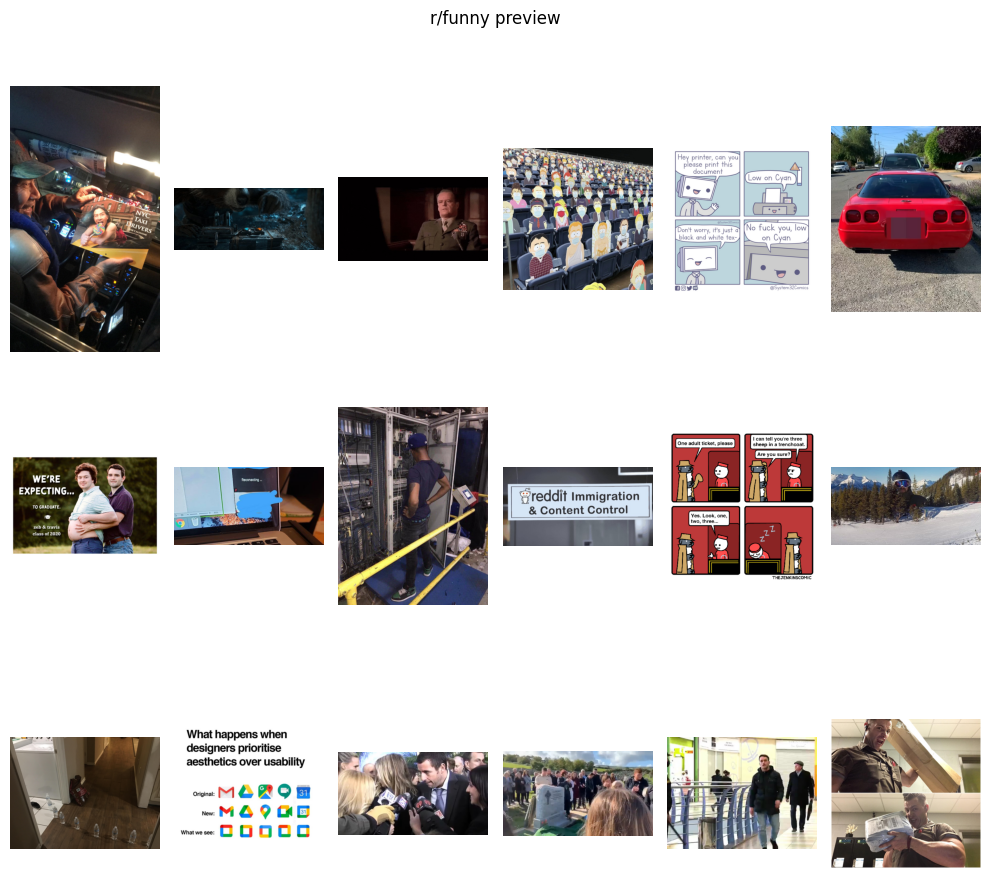

In [6]:
subreddit = "funny"
funny_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(funny_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:46,  2.13it/s]


Displaying 18 images in total
14 post did not have images, or failed to fetch


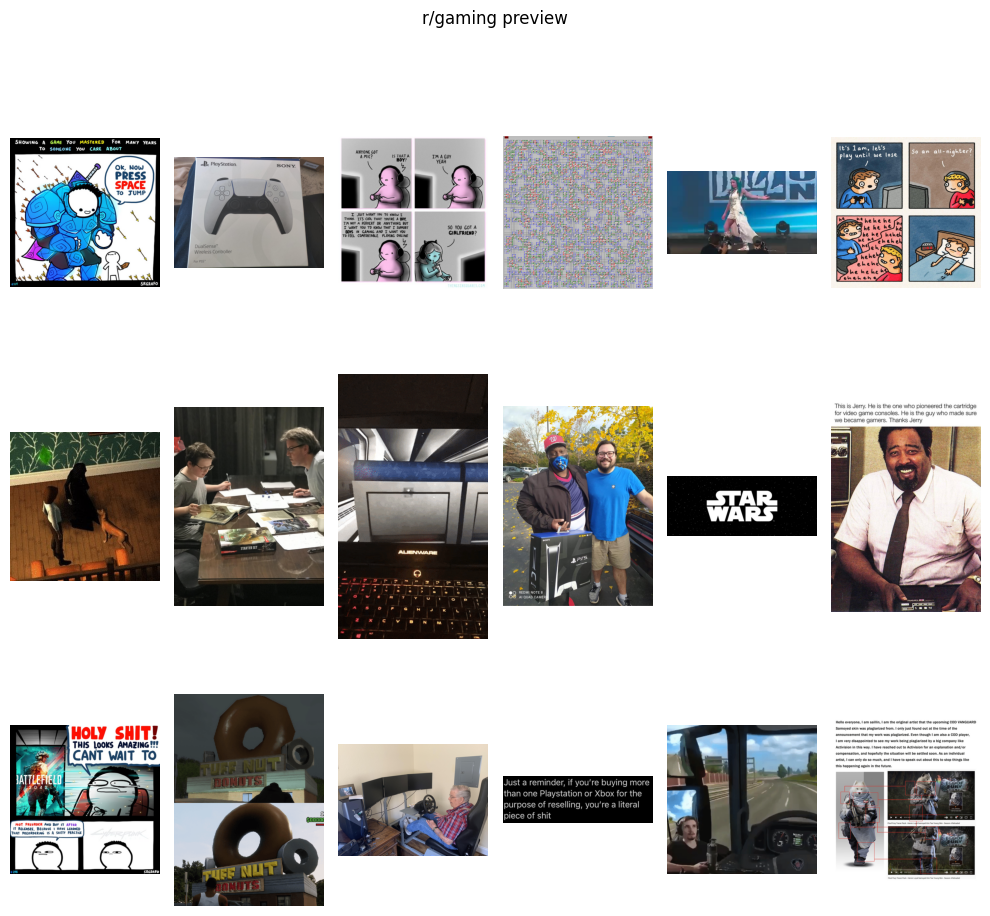

In [7]:
subreddit = "gaming"
gaming_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(gaming_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:19,  5.25it/s]


Displaying 18 images in total
5 post did not have images, or failed to fetch


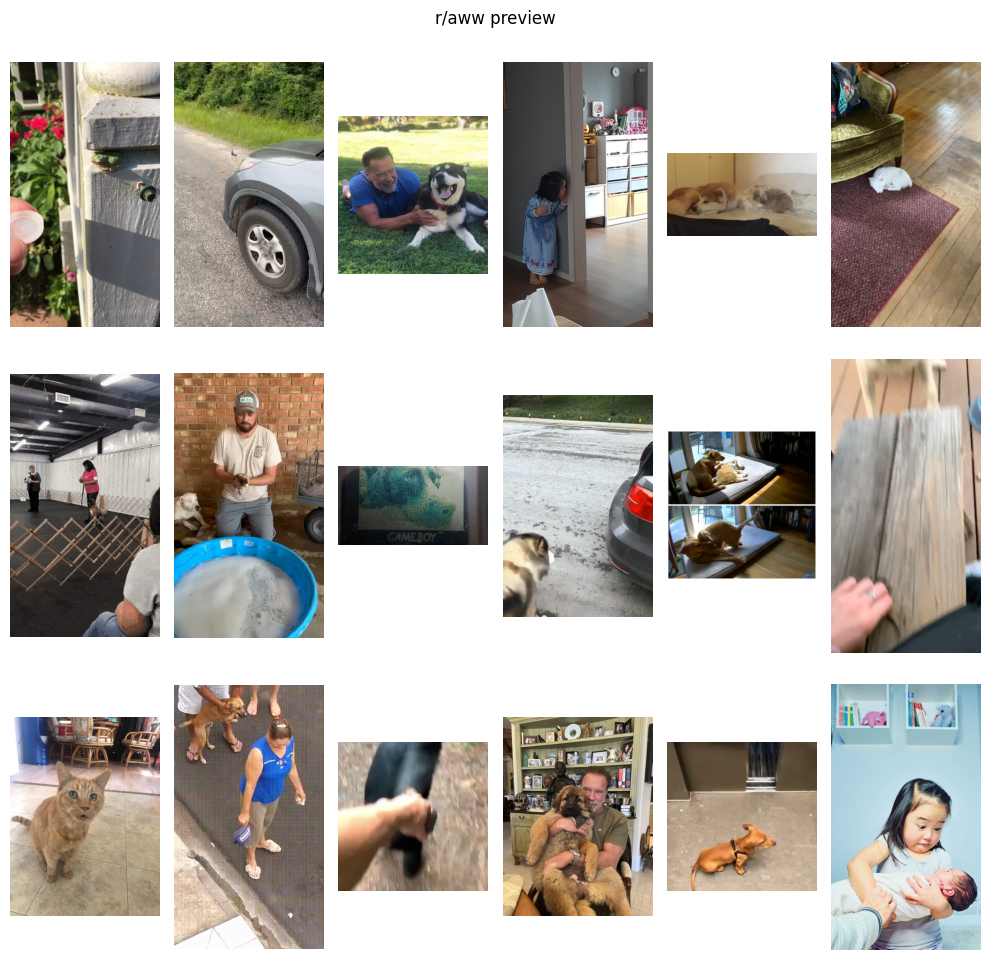

In [8]:
subreddit = "aww"
aww_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(aww_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:46,  2.15it/s]


Displaying 18 images in total
14 post did not have images, or failed to fetch


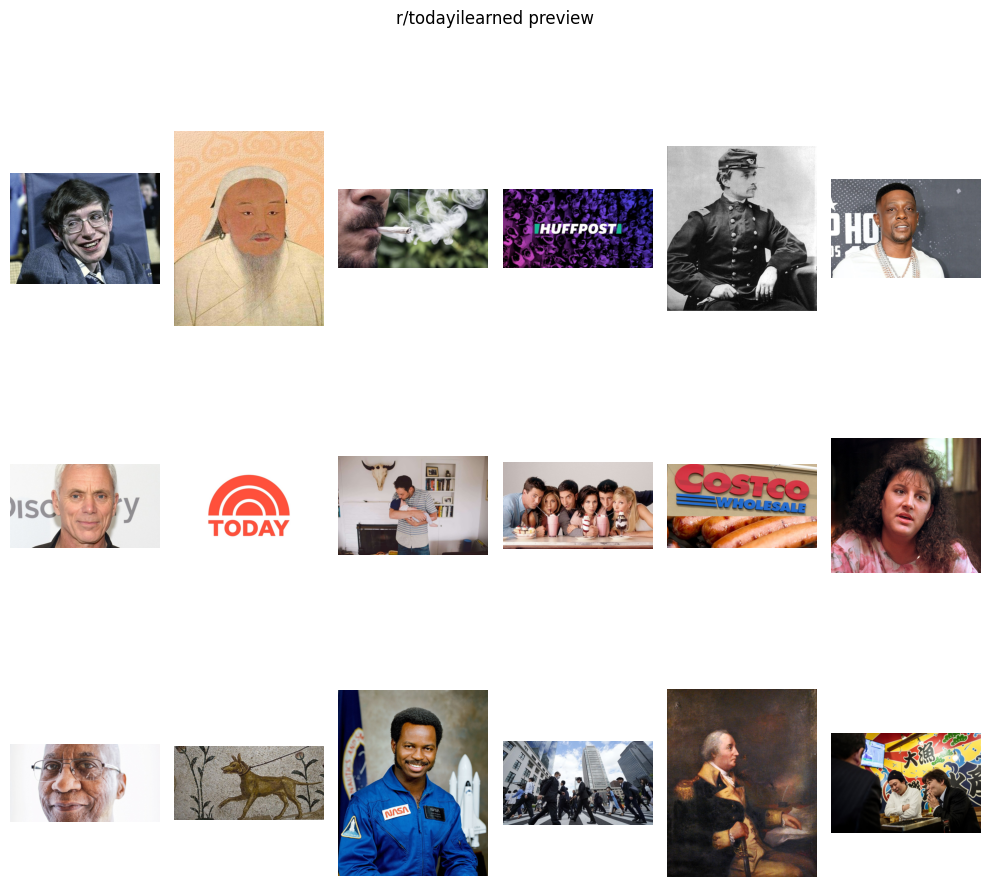

In [9]:
subreddit = "todayilearned"
todayilearned_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(todayilearned_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

In [20]:
funny_result[:20]

id                                              title  num_comments  \
0    7mjw12  My cab driver tonight was so excited to share ...          2452   
1    5gn8ru                        Guardians of the Front Page          4941   
2    7431qq  Gas station worker takes precautionary measure...          8674   
3    7kvjuz  The conversation my son and I will have on Chr...          4747   
4    j0w79j  The Denver Broncos have the entire town of ‘So...          2799   
5    d2bwot                                           Printers          2446   
6    i0wgoo  Just increased my car’s value by 1 billion dol...          1556   
7    ge4l65  My grandma wanted some “creative” grad photos ...          1825   
8    ghujvl  Today one of my 4th grade students renamed him...          2774   
9    q1a7iu                               Zuckerberg right now          3889   
10   6qatmn                                Reddit's Immigrants          2474   
11   hzd35i                            Sheep in Human Clothing           713   
12   7r9ptc  I took a few shots at Lake Louise today and Go...          2198   
13   euntmz  My kids came in and told me there was water co...          1456   
14   jr5wtk  "Are you sure you want to go back to the Old V...          4851   
15   7qt032                    These damn ads are what did it!          1638   
16  12knt5j  Adam Sandler and Jennifer Aniston are shocked ...          2505   
17   dhfigp  Irish man leaves funny recording for his funeral!          2602   
18   m9btq6                         "Where's your mask?" prank          6778   
19   9bx0o9  I get an email every time I get a package deli...          3200   

     score  upvote_ratio                date       domain   nsfw  \
0   308579          0.97 2017-12-28 03:00:55    i.redd.it  False   
1   283998          0.97 2016-12-05 17:41:14  i.imgur.com  False   
2   263332          0.97 2017-10-03 20:10:50   gfycat.com  False   
3   237024          0.94 2017-12-19 19:24:04  i.imgur.com  False   
4   226364          0.95 2020-09-27 18:33:58    i.redd.it  False   
5   220622          0.97 2019-09-10 18:25:47    i.redd.it  False   
6   219447          0.96 2020-07-30 23:14:12    v.redd.it  False   
7   217207          0.96 2020-05-05 19:43:57    i.redd.it  False   
8   211547          0.97 2020-05-11 19:26:45    imgur.com  False   
9   208216          0.91 2021-10-04 17:25:19    i.redd.it  False   
10  206383          0.93 2017-07-29 12:56:39  i.imgur.com  False   
11  205488          0.97 2020-07-28 11:35:43    i.redd.it  False   
12  202750          0.97 2018-01-18 13:35:37    imgur.com  False   
13  202370          0.94 2020-01-27 13:22:27    i.redd.it  False   
14  201713          0.91 2020-11-09 20:43:45    i.redd.it  False   
15  199562          0.93 2018-01-16 15:25:37   gfycat.com  False   
16  199470          0.94 2023-04-13 12:41:12    v.redd.it  False   
17  198855          0.98 2019-10-13 19:49:11    v.redd.it  False   
18  194045          0.86 2021-03-20 17:33:02    v.redd.it  False   
19  191492          0.96 2018-08-31 20:16:09    i.redd.it  False   

                                                image            author  
0   https://preview.redd.it/tojcmbvjwk601.jpg?auto...          the_Diva  
1   https://external-preview.redd.it/jzU2DNeq7eTA_...           iH8myPP  
2                                                None         Not Found  
3   https://external-preview.redd.it/2aiFaAJxn3bGe...           Romobyl  
4   https://preview.redd.it/x9h34hp8iqp51.jpg?auto...  Exclamation_Marc  
5   https://preview.redd.it/jlx9wokn7tl31.jpg?auto...    System32Comics  
6   https://external-preview.redd.it/kmjr2aKaLh9ur...    RudyWillingham  
7   https://preview.redd.it/gsnsg2xj20x41.jpg?auto...      Toll_House69  
8   https://external-preview.redd.it/xfBeX2fMCPDJq...        reddericks  
9   https://preview.redd.it/xfswcv73xgr71.jpg?auto...        Ericgreg20  
10  https://external-preview.redd.it/qc6vS8uWKFTCV...           iH8myPP  
11  https:/

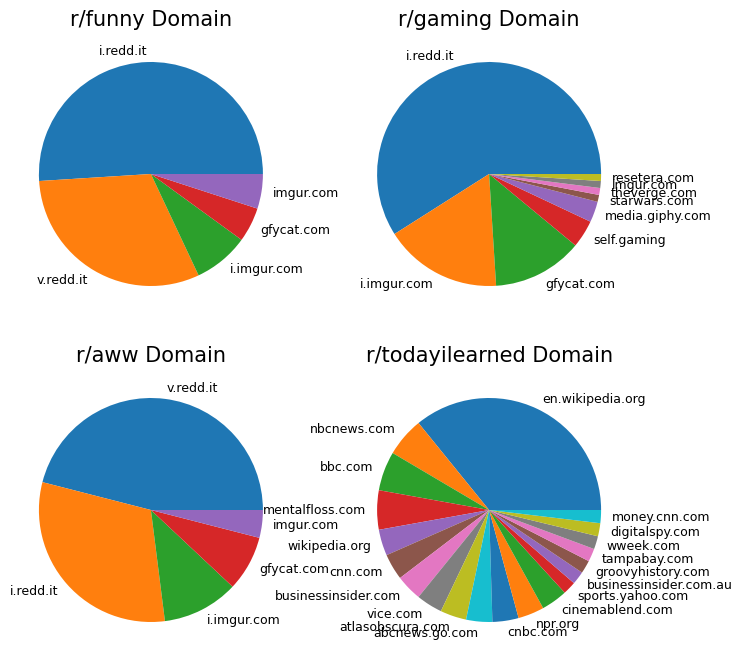

In [16]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 9
count_df_list = [funny_result, gaming_result, aww_result, todayilearned_result]
names = ["funny", "gaming", "aww", "todayilearned"]
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
  domain_count_df = count_df_list[i].domain.value_counts()[:20].reset_index()
  ax = axes[i // 2, i % 2]
  ax.pie(x=list(domain_count_df['count']), labels=list(domain_count_df['domain']), )
  ax.set_title(f"r/{names[i]} Domain", fontsize = 15)
plt.show()

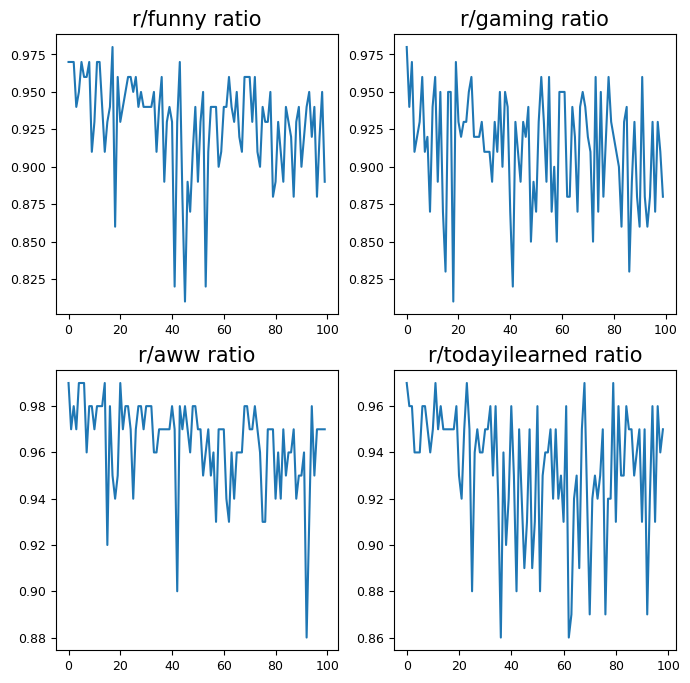

In [17]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 9

count_df_list = [funny_result, gaming_result, aww_result, todayilearned_result]
names = ["funny", "gaming", "aww", "todayilearned"]
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
  ax = axes[i // 2, i % 2]
  ax.plot(count_df_list[i].upvote_ratio)
  ax.set_title(f"r/{names[i]} ratio", fontsize = 15)
plt.show()

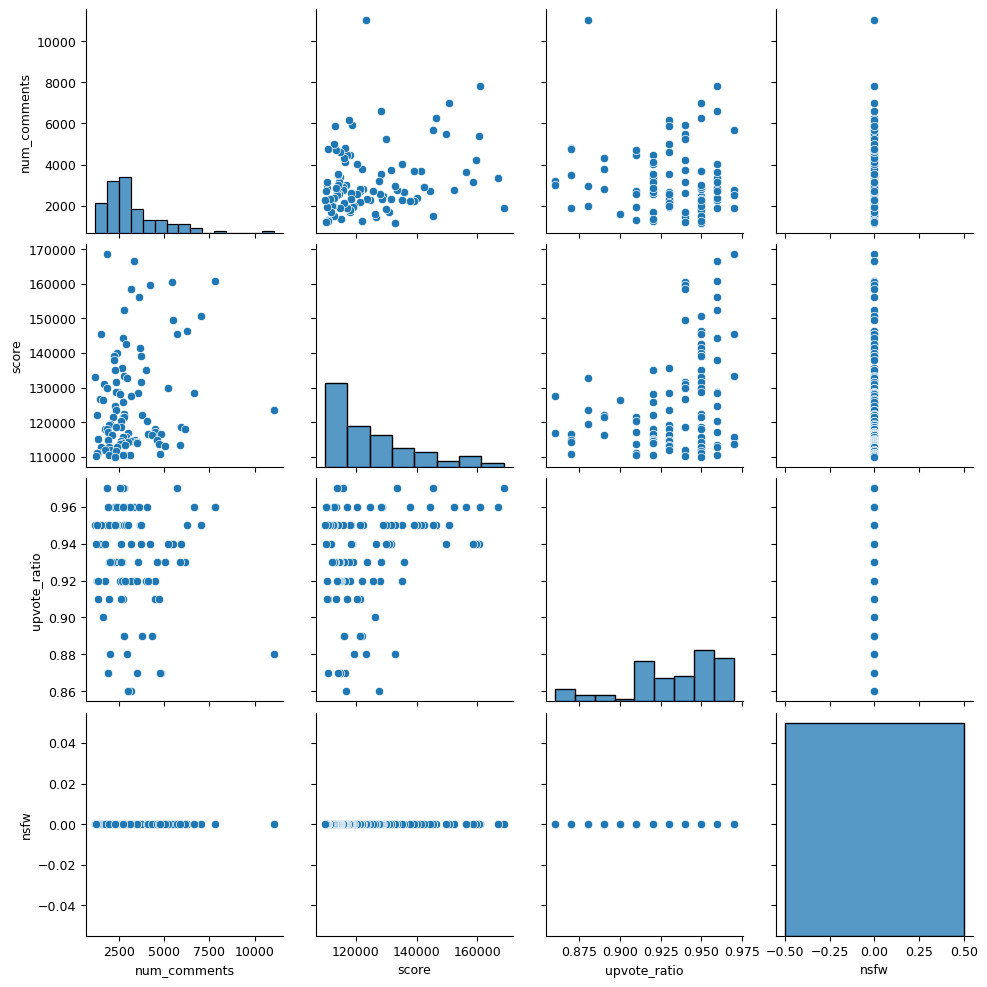

In [18]:
sns.pairplot(count_df_list[i])

<ipython-input-19-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
<ipython-input-19-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
<ipython-input-19-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
<ipython-input-19-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)


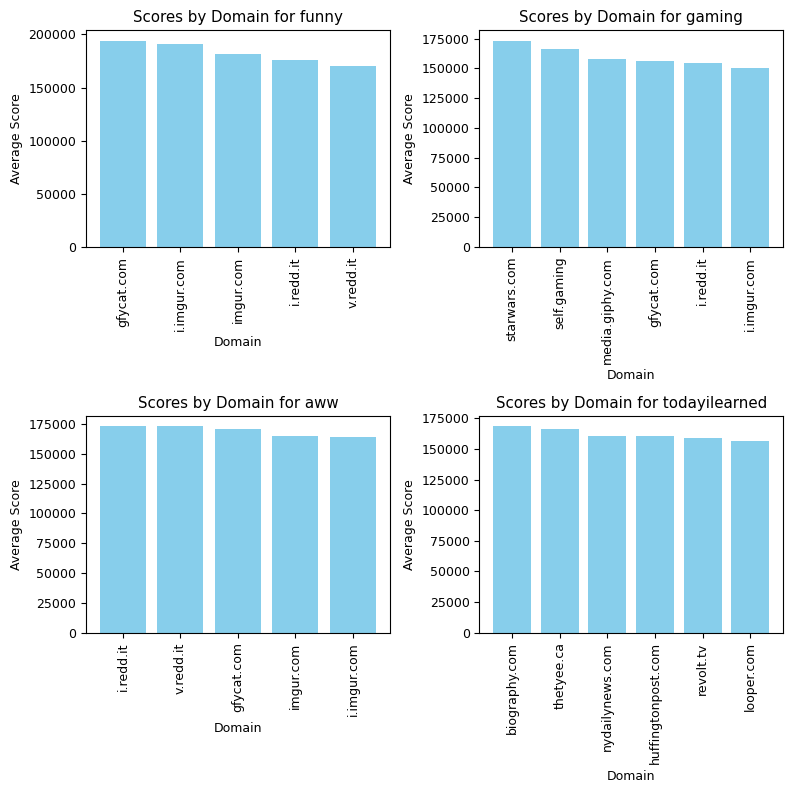

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    ax = axes[i // 2, i % 2]
    domain_vs_score_df = count_df_list[i].groupby('domain')['score'].mean().sort_values(ascending=False).reset_index()[:6]
    ax.bar(domain_vs_score_df['domain'], domain_vs_score_df['score'], color='skyblue')
    ax.set_xlabel('Domain')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Scores by Domain for {names[i]}')
    ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    ax = axes[i // 2, i % 2]
    domain_vs_score_df = count_df_list[i].groupby('domain')['score'].mean().sort_values(ascending=False).reset_index()[:6]
    ax.bar(domain_vs_score_df['domain'], domain_vs_score_df['score'], color='skyblue')
    ax.set_xlabel('Domain')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Scores by Domain for {names[i]}')
    ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
plt.tight_layout()
plt.show()